In [2]:
from skimage import io

import pickle
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

## Chargement Image Cifar

In [2]:
def unpickle(file):    
    with open(file, 'rb') as fo:
        # Decommanter cette ligne si problème de décodage
        # dict_cifar = pickle.load(fo, encoding='bytes')
        dict_cifar = pickle.load(fo, encoding='latin-1')
    return dict_cifar

In [3]:
def show_label_name():
    label_name = unpickle('../cifar_img/batches.meta')['label_names']
    print(label_name)
show_label_name()

def show_img(img):
    img = np.array(img)
    img = img.reshape(3, 32, 32).transpose(1, 2, 0)
    plt.imshow(img)
    plt.show()

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
def extract_cifar_from_dict(file):
    dict_cifar = unpickle(file)
    df_cifar = pd.DataFrame(dict_cifar['data'])
    df_cifar['target'] = dict_cifar['labels']
    return df_cifar

def create_binary_label(df):
    df['target'] = df['target'].apply(lambda x: 1 if x==0 else 0)
    return df

def export_Df_Csv(df, path, csv_name, index_=False):
    df.to_csv(path + csv_name, index=index_)

def export_DfXY_Csv(X, y, path, csv_name, index_=False):
    df = pd.concat([X, y], axis=1)
    df.to_csv(path + csv_name, index=index_)

def split_train_test_cifar(df_cifar):
    # Séparation des features et des labels
    X = df_cifar.drop('target', axis=1)
    y = df_cifar['target']
    return X, y

def load_one_cifar(file):
    df_cifar = extract_cifar_from_dict(file)
    df_cifar = create_binary_label(df_cifar)
    X, y = split_train_test_cifar(df_cifar)
    return X, y

def load_train_cifar(withExport=False, path='../data/', name='ref_data.csv'):
    X_train, y_train = load_one_cifar('../cifar_img/data_batch_1')
    for i in range(2,6):
        X, y = load_one_cifar('../cifar_img/data_batch_' + str(i))
        X_train = pd.concat([X_train, X])
        y_train = pd.concat([y_train, y])

    # Création fichier ref_data.csv
    if withExport:
        export_DfXY_Csv(X_train, y_train, path, name, index_=False)

    return X_train, y_train
    
def load_test_cifar(withExport=False, path='../data/', name='ref_data_Test.csv'):
    X_test, y_test = load_one_cifar('../cifar_img/test_batch')
    # Création fichier ref_data.csv
    if withExport:
        export_DfXY_Csv(X_test, y_test, path, name, index_=False)
    return X_test, y_test


def load_all_cifar(exportTrainCsv=False, exportTestCsv=False):
    X_train, y_train = load_train_cifar(exportTrainCsv)
    X_test, y_test = load_test_cifar(exportTestCsv)
    return X_train, y_train, X_test, y_test


In [48]:
X_train, y_train, X_test, y_test = load_all_cifar(False,False)

In [17]:
# load ref_data.csv
df_ref_data = pd.read_csv('../data/ref_data.csv', dtype=np.uint8)
X_train_csv = df_ref_data.drop('target', axis=1)
y_train_csv = df_ref_data['target']

df_ref_test = pd.read_csv('../data/ref_data_Test.csv', dtype=np.uint8)
X_test_csv = df_ref_test.drop('target', axis=1)
y_test_csv = df_ref_test['target']

In [87]:
type(X_train[0])

numpy.ndarray

In [8]:
X_train_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80


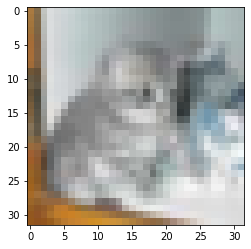

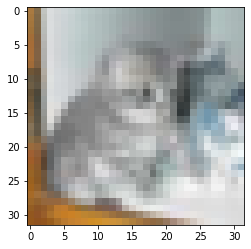

In [9]:
show_img(X_train.iloc[36])
show_img(X_train_csv.iloc[36])

## Entrainement des modèles

In [4]:
from sklearn.decomposition import PCA

In [49]:
# PCA


X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')
X_train_norm /= 255
X_test_norm /= 255

pca = PCA(n_components=0.95)
pca.fit(X_train_norm)
print(pca.explained_variance_ratio_)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)


[2.9076636e-01 1.1253149e-01 6.6944100e-02 3.6764584e-02 3.6088429e-02
 2.8092301e-02 2.7129920e-02 2.1671632e-02 2.0646427e-02 1.4380011e-02
 1.3105633e-02 1.0659781e-02 1.0499810e-02 1.0042683e-02 9.1848187e-03
 8.1740040e-03 7.3960777e-03 7.1612992e-03 6.8747201e-03 6.4324345e-03
 5.9439628e-03 5.8735460e-03 4.9556768e-03 4.9079219e-03 4.8045204e-03
 4.6587745e-03 4.5134798e-03 4.4365432e-03 4.0078065e-03 3.9386628e-03
 3.6621755e-03 3.3313942e-03 3.2396512e-03 3.1024604e-03 3.0758684e-03
 2.9125002e-03 2.6121901e-03 2.5926074e-03 2.5434548e-03 2.4837761e-03
 2.4267114e-03 2.2931932e-03 2.2817466e-03 2.2151789e-03 2.1026023e-03
 2.0673166e-03 1.9245723e-03 1.9037912e-03 1.8466007e-03 1.8169627e-03
 1.7805202e-03 1.7360058e-03 1.7116537e-03 1.6975936e-03 1.6233450e-03
 1.5859044e-03 1.5641170e-03 1.5430062e-03 1.5309257e-03 1.4992371e-03
 1.4578415e-03 1.4232517e-03 1.4111665e-03 1.3770667e-03 1.3485469e-03
 1.3266667e-03 1.2884326e-03 1.2431352e-03 1.2138684e-03 1.2120648e-03
 1.185

In [3]:
from imblearn.over_sampling import SMOTE

In [45]:
# ADD SMOTE DATA
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

In [40]:
X_train_pca = X_train_pca[:10000]
y_train_pca = y_train[:10000]
X_train_norm = X_train_norm[:10000]
y_train = y_train[:10000]

X_test_pca = X_test_pca[:5000]
y_test_pca = y_test[:5000]
X_test_norm = X_test_norm[:5000]
y_test = y_test[:5000]

In [50]:
# SMOTE PCA
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote_pca, y_train_smote_pca = sm.fit_resample(X_train_pca, y_train)

### Réduction des données

### Random Forest

In [12]:
## Random Forest => NORMAL (Pas de diff avec les données normalisées.
## Plutôt logique car tous les champs sont dans la même échelle 
## entre 0 et 255)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[8935   65]
 [ 727  273]]
0.40807174887892383
0.6328888888888888


In [11]:
## Random Forest => NORMALISATION (Pas de diff avec les données brutes
## Plutôt logique car tous les champs sont dans la même échelle 
## entre 0 et 255)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train_norm, y_train)
y_pred = rf.predict(X_test_norm)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[8935   65]
 [ 728  272]]
0.4068810770381451
0.6323888888888889


In [29]:
## Random Forest => PCA
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[8983   17]
 [ 891  109]]
0.1936056838365897
0.5535555555555556


In [ ]:
## Random Forest => SMOTE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_norm)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

In [31]:
# Random Forest => SMOTE PCA
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train_smote_pca, y_train_smote_pca)
y_pred = rf.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[8660  340]
 [ 580  420]]
0.4772727272727273
0.6911111111111111


### MLP

In [38]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, activation='logistic', learning_rate='adaptive', solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# Résultat étonnant. Le MLP prédit tjr faux si données pas normalisées
print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[9000    0]
 [1000    0]]
0.0
0.5


In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, activation='logistic', learning_rate='adaptive', solver='adam')
mlp.fit(X_train_norm, y_train)
y_pred = mlp.predict(X_test_norm)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[4371  141]
 [ 293  195]]
0.4733009708737865
0.6841700819672132


c:\Users\merci\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, activation='logistic', learning_rate='adaptive', solver='adam')
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[4287  225]
 [ 291  197]]
0.4329670329670329
0.676910751656784


In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, activation='logistic', learning_rate='adaptive', solver='adam')
mlp.fit(X_train_smote, y_train_smote)
y_pred = mlp.predict(X_test_norm)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[3963  549]
 [ 186  302]]
0.4510828976848394
0.7485884635507498


In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, activation='logistic', learning_rate='adaptive', solver='adam')
mlp.fit(X_train_smote_pca, y_train_smote_pca)
y_pred = mlp.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))

print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))

[[8427  573]
 [ 470  530]]
0.504041844983357
0.7331666666666667


In [ ]:
# To pickle
# with open('../artifacts/model.pkl', 'wb') as f:
#     pickle.dump(mlp, f)
#     f.close()

In [ ]:
# # Use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV

# param_grid = {
#                 'activation': ['relu', 'tanh', 'logistic'],
#                 'solver': ['sgd', 'adam', 'lbfgs'],
#                 'learning_rate': ['constant', 'invscaling', 'adaptive']}
# mlp = MLPClassifier(max_iter=20)
# grid = GridSearchCV(mlp, param_grid, cv=3, scoring='balanced_accuracy')
# grid.fit(X_train_norm, y_train)
# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)

# # {'activation': 'logistic', 'learning_rate': 'adaptive', 'solver': 'adam'}
# # 0.3269629215793164
# # MLPClassifier(activation='logistic', learning_rate='adaptive', max_iter=20)
# 131min49.s

# param_grid = {'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)]}
# mlp = MLPClassifier(max_iter=20, activation='logistic', learning_rate='adaptive', solver='adam')
# grid = GridSearchCV(mlp, param_grid, cv=3, scoring='f1')
# grid.fit(X_train_norm, y_train)
# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)

# {'hidden_layer_sizes': (100, 100, 100)}
# 0.3973135120913219
# MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
#               learning_rate='adaptive', max_iter=20)

# Embedding model

In [112]:
# With openCv, I want a class to load single image with the same type of data as cifar
import cv2
import numpy as np
import pandas as pd
import pickle

class embedding_img:
    path = None
    img_cifar = None
    
    def __init__(self, path):
        self.path = path
        img = cv2.imread(path)
        self.transform(img)

    def get_img(self):
        return self.img_cifar
    
    def show_img(self):
        img = np.array(self.img_cifar)
        img = img.reshape(3, 32, 32).transpose(1, 2, 0)
        plt.imshow(img)
        plt.show()
    
    def transform(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))

        red_channel = img[:,:,0].reshape(-1)
        green_channel = img[:,:,1].reshape(-1)
        blue_channel = img[:,:,2].reshape(-1)    
    
        self.img_cifar = pd.DataFrame(np.concatenate((red_channel, green_channel, blue_channel))).transpose()
        return self.img_cifar

# pickle the embedding_img class
# with open('../artifacts/embedding_img.pkl', 'wb') as f:
#     pickle.dump(embedding_img, f)

In [2]:
# Test embedding
# To pickle
import pickle

# with open('../artifacts/embedding_img.pkl', 'rb') as f:
#     embedding = pickle.load(f)

with open('../artifacts/model.pkl', 'rb') as f:
    model = pickle.load(f)


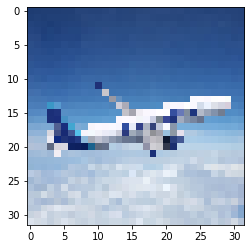

array([1], dtype=int64)

In [114]:
img = embedding('../cifar_img/avionTest1.jpg')
img.show_img()
model.predict(img.get_img())


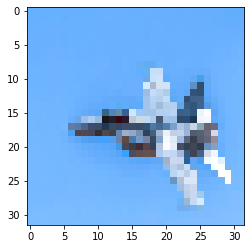

array([1], dtype=int64)

In [115]:
img = embedding('../cifar_img/avionTest2.jpg')
img.show_img()
model.predict(img.get_img())

## Encodeur plus simple

In [1]:
# Use PIL to load an image and transform it to the same type of data as cifar
# Image must be 32x32 and final array must be 1x3072 with 1024 for each color and with the red color first, then green and finally blue
from PIL import Image
import numpy as np

def encode_img(path):
    img = Image.open(path)
    img = img.resize((32, 32))    
    r,g,b = img.split()
    r = np.array(r).reshape(-1)
    g = np.array(g).reshape(-1)
    b = np.array(b).reshape(-1)
    tab = np.concatenate((np.array(r), np.array(g), np.array(b)))
    return tab.reshape(1, -1)

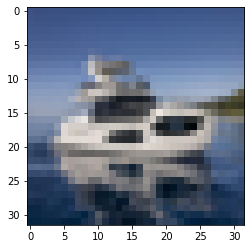

0
0.9573967456817627


In [20]:
# test
# img = encode_img('../cifar_img/avionTest1.jpg')
# show_img(img)
# print(model.predict(img))

# # test
# img = encode_img('../cifar_img/avionTest2.jpg')
# show_img(img)
# print(model.predict(img))

# # test
# img = encode_img('../cifar_img/chatTest1.jpg')
# show_img(img)
# print(model.predict(img))

# test
img = encode_img('../cifar_img/bateauTest1.jpeg')
show_img(img)
r =model.predict(img)
print(r.tolist()[0])
r1 = model.predict_proba(img)
print(r1.tolist()[0][r.tolist()[0]])

In [ ]:
# TODO : Comprendre pourquoi l'image chargé avec PIL
# n'est pas la même que celle chargé avec cv2

In [7]:
import pandas as pd

df = pd.read_csv('../data/prod_data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,label,prediction
0,205,205,205,206,206,205,206,206,205,205,...,122,130,147,136,145,143,143,135,0,0
1,88,94,101,107,116,122,127,132,137,142,...,90,90,89,87,87,85,81,79,1,0
2,235,225,192,202,235,236,231,203,213,216,...,226,228,227,232,234,232,233,233,1,1


### TEST FICHIER TRAINMODEL.PY

In [5]:
def normalize_data(X_train, X_test):
    X_train /= 255
    X_test /= 255
    return X_train, X_test

def smote_data(X_train, y_train):
    sm = SMOTE(sampling_strategy='minority')
    X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, y_train

def pca_data(X_train, X_test, loadPCA=False, withExport=False):
    if loadPCA:
        script_dir = os.path.abspath('')
        pca_file_path = os.path.join(script_dir, '../artifacts/pca.pkl')
        with open(pca_file_path, 'rb') as f:
            pca = pickle.load(f)
    else:
        pca = PCA(n_components=0.95)
        pca.fit(X_train)
        if withExport:
            script_dir = os.path.abspath('')
            pca_file_path = os.path.join(script_dir, '../artifacts/pca.pkl')
            with open(pca_file_path, 'wb') as f:
                pickle.dump(pca, f)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    return X_train, X_test

def traitement_data(X_train, y_train, X_test, y_test, listType, loadPCA=False, exportPCA=False):
    # Cas vide
    if len(listType) == 0:
        return X_train, y_train, X_test, y_test
    
    # Traitement des données
    if 'norm' in listType:
        X_train, X_test = normalize_data(X_train, X_test)
    if 'pca' in listType:
        X_train, X_test = pca_data(X_train, X_test, loadPCA, exportPCA)
    if 'smote' in listType:
        X_train, y_train = smote_data(X_train, y_train)

    return X_train, y_train, X_test, y_test

def load_file_To_DataFrame(file):
    script_dir = os.path.abspath('')
    file_path = os.path.join(script_dir, file)
    try:
        df = pd.read_csv(file_path)
    except:
        print("Erreur lors du chargement de : ", file_path)
        sys.exit(1)
    return df

def split_X_Y(df):
    # Séparation des features et des labels
    X = df.drop('target', axis=1)
    y = df['target']
    return X, y

def export_DfXY_Csv(X, y, file_path):
    script_dir = os.path.abspath('')
    file_path = os.path.join(script_dir, file_path)
    df_X = pd.DataFrame(X)
    df_y = pd.DataFrame(y)
    df = pd.concat([df_X, df_y], axis=1)
    df.to_csv(file_path, index=False)
    print("Export de : ", file_path, " réussi !")

def processessing_Data_from_file(pathTrain, pathTest, listType=[], loadPCA=False, exportPCA=True):
    # Chargement des données
    print("Chargement des données... 1/4")
    ref_data = load_file_To_DataFrame(pathTrain)
    test_data = load_file_To_DataFrame(pathTest)
    
    # Séparation des features et des labels
    print("Séparation des features et des labels... 2/4")
    X_train, y_train = split_X_Y(ref_data)
    X_test, y_test = split_X_Y(test_data)

    # Traitement des données
    print("Traitement des données... 3/4")
    X_train, y_train, X_test, y_test = traitement_data(X_train, y_train, X_test, y_test, listType, loadPCA, exportPCA)

    # Export des données
    #print("Export des données... 4/4")
    # file_name = os.path.splitext(pathTrain)[0] + "_pca.csv"
    # export_DfXY_Csv(X_train, y_train, file_name)
    # file_name = os.path.splitext(pathTest)[0] + "_pca.csv"
    # export_DfXY_Csv(X_test, y_test, file_name)

In [9]:
ref_data = load_file_To_DataFrame("../data/ref_data.csv")
test_data1 = load_file_To_DataFrame("../data/ref_data_Test.csv")

In [19]:
test_data1 = load_file_To_DataFrame("../data/ref_data_Test_pca.csv")

In [11]:
test_data.shape

(10000, 3073)

In [20]:
test_data1.shape

(10004, 219)

In [22]:
nn = [str(i) for i in range(3072)]

In [8]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070',
       '3071'],
      dtype='object', length=3072)

In [46]:
img_encode = [i for i in range(3072)]
pd.DataFrame([img_encode])

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071


In [48]:
with open("../artifacts/pca.pkl", 'rb') as f:
    pca = pickle.load(f)

feature_names = [str(i) for i in range(3072)]
img_encode = [str(i) for i in range(3072)]
img_encode_df = pd.DataFrame([img_encode], columns=feature_names)
pca.transform(img_encode_df)

array([[ 7.65893894e+04,  3.86872517e+04,  2.92404786e+04,
         1.98687924e+04,  3.08900071e+04, -3.51709905e+03,
         1.52391455e+03, -9.03135613e+02,  4.10324446e+03,
        -1.40897354e+02, -1.67822093e+02,  4.94007594e+02,
        -1.20956512e+02, -1.66663794e+03, -2.27004776e+02,
        -1.18757963e+02,  6.05363687e+03,  9.92852457e+02,
        -1.71745501e+03,  6.23961539e+01,  2.78311186e+02,
        -7.15617765e+02, -4.47187825e+02,  4.37551778e+02,
         1.13831971e+03,  6.32245830e+02,  2.22286626e+02,
         5.18028001e+00,  8.03976281e+02, -3.39768479e+02,
        -4.62589126e+02, -4.91235923e+01, -8.66776397e+01,
         1.02282663e+02,  4.33469104e+02, -7.44030528e+01,
         1.02621866e+02, -2.03916046e+02, -2.73284292e+02,
         2.70570000e+02,  4.85451390e+01,  2.04205569e+02,
         1.29511547e+02,  2.59142532e+02,  2.33157766e+02,
         3.08464544e+02, -8.11989135e+00,  3.78943587e+01,
        -1.96582126e+01, -2.69489116e+02,  1.04873360e+0

In [ ]:
print("Dict_model : ", dict_model)
print("Best model : ", best_model(dict_model, 'balanced_accuracy_score'))

In [100]:
test_data_cifar = load_file_To_DataFrame('../data/ref_data_Test.csv')
test_data_cifar = test_data_cifar.drop(['prediction'], axis=1)
X_test, _ = split_X_Y(test_data_cifar)
_, X_test = pca_data(X_test, X_test, True, False)

In [103]:
# Export X_test to csv
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
0,5249.251933,1998.528666,1840.835035,264.288790,-1348.288212,-29.635208,-37.744011,-60.675417,379.096598,-27.954029,...,-99.582715,149.115409,-27.663881,121.735867,-123.527776,92.264786,-54.736725,-19.081738,-7.756616,32.820037
1,8672.073177,-675.650970,2814.073718,-1297.686015,-576.084033,-520.788716,-313.028914,-933.271009,878.650981,-987.358032,...,31.260297,19.771352,-61.389340,69.165610,39.122690,-16.463100,-85.068884,27.512815,-54.667257,1.271265
2,7336.164317,-486.097628,2569.454083,-279.746154,-807.002931,-685.300112,1334.651746,184.836071,793.002409,132.954753,...,13.640326,-0.462485,-37.337930,-10.830908,37.481346,25.830022,36.551762,48.519177,3.969841,48.547986
3,8188.401931,795.219015,3119.941978,-746.512209,-900.015134,709.558325,231.629832,126.091426,206.777963,210.473739,...,18.976231,19.173025,58.489797,100.611012,-52.405949,-2.264476,8.381209,48.129049,18.297132,-31.335501
4,4796.641005,2869.239602,1991.894078,-742.624150,-760.517453,-348.067532,149.666793,160.864656,551.417390,39.856296,...,43.423344,19.851641,76.425296,-31.501172,21.001613,121.553836,-44.286565,-62.088680,-44.927028,34.444489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7282.115327,4005.753430,4086.075522,-981.686931,-182.878928,-1363.775372,327.918974,-1673.361938,616.026071,-686.979782,...,-21.486513,-6.329908,-111.721199,-102.980682,26.553896,77.429354,54.866992,140.021288,-154.522378,18.925188
9996,5216.431169,3820.980927,1364.377278,-94.862133,-1363.717424,-714.793837,-14.288221,-412.629520,421.729518,110.785589,...,-61.934376,-86.545797,79.283426,-21.292752,42.805705,74.260325,-75.605171,3.267738,-72.340456,72.906625
9997,2237.313632,2405.677040,1463.658128,-884.178027,-64.268551,-1490.246267,-192.177491,56.647554,28.019313,138.965503,...,72.874891,12.677059,40.138623,21.399452,-71.344998,7.053074,-16.315863,-33.847451,-53.934539,-5.681619
9998,4643.012842,2288.705545,2453.583116,-571.900071,-998.214629,-887.834834,-22.912448,-163.138554,1041.343497,131.332636,...,-2.555669,38.971471,29.922761,-77.840548,-17.813575,26.378700,-212.737998,109.166168,-32.887917,-149.612470


In [77]:
ref_test = pd.read_csv('../data/ref_data_Test_pca.csv')
ref_test.shape

(10000, 219)

In [ ]:
print(ref_test.shape)

(10000, 218)
(10000, 219)


In [76]:
d={}
with open("../artifacts/model_score.txt") as f:
    for line in f:
       (key, val) = line.split(",")
       d[key] = float(val)
d

{'f1_score': 0.507447354904982, 'balanced_accuracy_score': 0.742}